In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset

original_dataset = pd.read_csv("bengaluru_house_prices.csv")
df = original_dataset.copy()

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape

(13320, 9)

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [11]:
df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns', inplace=True)

In [12]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
# handle the missing values

df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

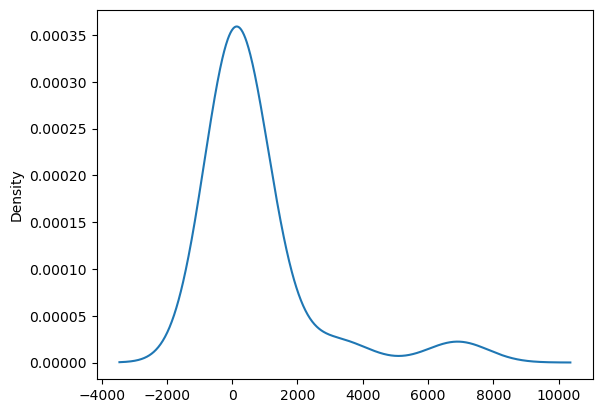

In [14]:
df['bath'].value_counts().plot(kind='kde')
plt.show()

In [15]:
# Note: the null values are less in number compared to the total rows
# so we can even drop these rows.

df.dropna(axis=0, inplace=True)

In [16]:
# check the null values again

df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
# no null values

In [18]:
df['size']= df['size'].str.replace("Bedroom", 'BHK')

In [19]:
df['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [20]:
# remove the word BHK

df['size'] = df['size'].str.split().str[0]
df['size'].value_counts()

size
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [21]:
df['size'].dtype

dtype('O')

In [22]:
# change data type of col 'size'

df['size']=df['size'].astype('int')
print(df['size'].dtype)

int64


In [23]:
df[df['size']>20]

,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
4684,Munnekollal,43,2400,40.0,660.0


In [24]:
# These two cols seem to have large area in sq fee

In [25]:
df['total_sqft'].dtype

dtype('O')

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 

In [27]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [28]:
# convert the col: total_sqft into num so that I can also calculate the average area

def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
convert_sqft_to_num("100 - 200")

150.0

In [30]:
convert_sqft_to_num("300")

300.0

In [31]:
convert_sqft_to_num("300sq.meter")

In [32]:
# apply the above function

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [33]:
df['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [34]:
df['total_sqft'].dtype

dtype('float64')

In [35]:
# feature engineering
# calculating the price per square feet 

df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [36]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [37]:
df['location'].nunique()

1304

In [38]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [39]:
# df.location = df.location.apply(lambda x: x.split())

In [40]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [61]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
other                        2892
Whitefield                    535
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                269
                             ... 
HAL 2nd Stage                  11
Nehru Nagar                    11
Kodigehalli                    11
2nd Phase Judicial Layout      11
Pattandur Agrahara             11
Name: location, Length: 242, dtype: int64

In [41]:
df['location'] = df['location'].str.replace("whitefiled", "Whitefield")

In [42]:
df['location'] = df['location'].str.replace("Kanakapura  Rod", "Kanakpura Road")

In [43]:
df['location'] = df['location'].str.replace("Kanakapur main road", "Kanakpura Road")

In [44]:
df['location'] =df['location'].str.replace("Kanakapura Main Road", "Kanakpura Road")

In [45]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield              535
Sarjapur  Road          392
Electronic City         302
Kanakpura Road          269
Thanisandra             233
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kanakadasa Layout         1
white field,kadugodi      1
Name: location, Length: 1300, dtype: int64

In [46]:
location_stats = df['location'].value_counts()

In [47]:
len(location_stats[location_stats <= 10])

1059

In [48]:
location_stats_less_10 = location_stats[location_stats <= 10]

In [49]:
location_stats_less_10

location
Nagappa Reddy Layout         10
Ganga Nagar                  10
Nagadevanahalli              10
Dodsworth Layout             10
1st Block Koramangala        10
                             ..
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Brigade Road                  1
Maruthi HBCS Layout           1
Abshot Layout                 1
Name: count, Length: 1059, dtype: int64

In [50]:
len(df.location.unique())

1300

In [51]:
# assign all the location with less than 10 or equal to 10 to category: 'other'

df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_10 else x)

In [52]:
df['location'].value_counts()

location
other                 2892
Whitefield             535
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         269
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [53]:
len(df['location'].unique())

242

In [54]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  int64  
 2   total_sqft      13200 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


#### Outliers removal

In [62]:
df[(df['total_sqft']/df['size'])<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,other,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000


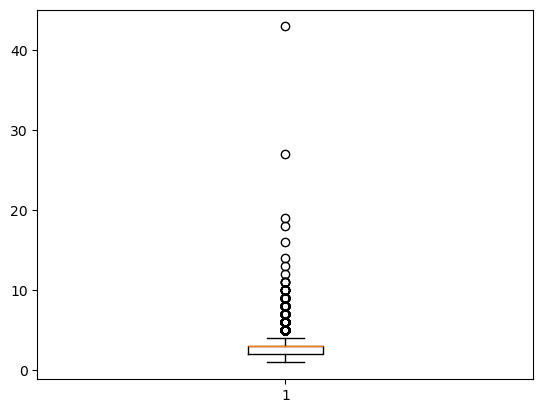

In [57]:
plt.boxplot(df['size'])
plt.show()

In [64]:
df[(df['total_sqft']/df['size'])<300].shape

(744, 6)

In [67]:
# remove all the outliers
df = df[~((df['total_sqft']/df['size'])<300)]
df.shape

(12502, 6)

In [68]:
df[((df['total_sqft']/df['size'])<300)]

,location,size,total_sqft,bath,price,price_per_sqft
